In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statistics as stats

In [2]:
df=pd.read_csv('restaurants.csv')
df

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000
...,...,...,...,...,...,...,...,...
6588,Shree Rathnam,"Wave Mall,BRS Nagar, West Ludhiana",West Ludhiana,Ludhiana,South Indian,4.1,20,600
6589,Cafe Delish,"Radisson Blu,Rajguru Nagar, West Ludhiana",West Ludhiana,Ludhiana,"Multi-Cuisine, North Indian, Continental, A...",4.4,48,3100
6590,3 K Resorts,"BRS Nagar, West Ludhiana",West Ludhiana,Ludhiana,North Indian,1.0,1,1100
6591,Dovka Bar,"Nirvana Hotel Banquets Club,PAU, Central Ludhiana",Central Ludhiana,Ludhiana,"North Indian, Chinese, Finger Food",4.3,3,1500


In [3]:
df.shape

(6593, 8)

In [4]:
df.size

52744

In [5]:
df.head(10)

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000
5,Ardor 2.1 Restaurant and Lounge,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Multi-Cuisine, North Indian, Italian, Chine...",3.9,1391,2000
6,The Luggage Room By Sandoz,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Multi-Cuisine, North Indian, Italian, Chine...",4.0,1022,1800
7,QBA,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Multi-Cuisine, North Indian, Italian, Conti...",4.3,963,2100
8,My Bar Square,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, Italian, Chinese, Continental",3.9,506,1500
9,Ghoomar Traditional Thali Restaurant,"Connaught Place, Central Delhi",Central Delhi,Delhi,Rajasthani,4.2,712,1000


In [6]:
df.tail(10)

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost
6583,The Biker's Sky Lounge Cafe,"Sarabha Nagar, West Ludhiana",West Ludhiana,Ludhiana,North Indian,1.0,1,800
6584,The Yard Lounge & Bar,"Pakhowal Road, West Ludhiana",West Ludhiana,Ludhiana,"North Indian, Italian, Chinese",3.5,4,900
6585,Sixtynine.ml,"Aggar Nagar, West Ludhiana",West Ludhiana,Ludhiana,"Multi-Cuisine, North Indian, Continental, A...",3.9,23,1200
6586,Salsa Spice And Grill,"BRS Nagar, West Ludhiana",West Ludhiana,Ludhiana,"North Indian, Fast Food, Chinese",3.5,15,1000
6587,Hungry Point,"PAU, Central Ludhiana",Central Ludhiana,Ludhiana,"Fast Food, Pizza, Italian",1.0,1,500
6588,Shree Rathnam,"Wave Mall,BRS Nagar, West Ludhiana",West Ludhiana,Ludhiana,South Indian,4.1,20,600
6589,Cafe Delish,"Radisson Blu,Rajguru Nagar, West Ludhiana",West Ludhiana,Ludhiana,"Multi-Cuisine, North Indian, Continental, A...",4.4,48,3100
6590,3 K Resorts,"BRS Nagar, West Ludhiana",West Ludhiana,Ludhiana,North Indian,1.0,1,1100
6591,Dovka Bar,"Nirvana Hotel Banquets Club,PAU, Central Ludhiana",Central Ludhiana,Ludhiana,"North Indian, Chinese, Finger Food",4.3,3,1500
6592,Urban Vibes,"Aggar Nagar, West Ludhiana",West Ludhiana,Ludhiana,"Multi-Cuisine, North Indian, Italian, Chine...",3.8,12,2000


In [7]:
df.isnull()

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6588,False,False,False,False,False,False,False,False
6589,False,False,False,False,False,False,False,False
6590,False,False,False,False,False,False,False,False
6591,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

,0
Name,0
Location,0
Locality,0
City,0
Cuisine,0
Rating,0
Votes,0
Cost,0


In [9]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
6588,False
6589,False
6590,False
6591,False


In [10]:
df.empty

False

In [11]:
df.dropna()

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000
...,...,...,...,...,...,...,...,...
6588,Shree Rathnam,"Wave Mall,BRS Nagar, West Ludhiana",West Ludhiana,Ludhiana,South Indian,4.1,20,600
6589,Cafe Delish,"Radisson Blu,Rajguru Nagar, West Ludhiana",West Ludhiana,Ludhiana,"Multi-Cuisine, North Indian, Continental, A...",4.4,48,3100
6590,3 K Resorts,"BRS Nagar, West Ludhiana",West Ludhiana,Ludhiana,North Indian,1.0,1,1100
6591,Dovka Bar,"Nirvana Hotel Banquets Club,PAU, Central Ludhiana",Central Ludhiana,Ludhiana,"North Indian, Chinese, Finger Food",4.3,3,1500


In [12]:
df.all()

,0
Name,True
Location,True
Locality,True
City,True
Cuisine,True
Rating,True
Votes,True
Cost,True


In [13]:
df.drop_duplicates()

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000
...,...,...,...,...,...,...,...,...
6588,Shree Rathnam,"Wave Mall,BRS Nagar, West Ludhiana",West Ludhiana,Ludhiana,South Indian,4.1,20,600
6589,Cafe Delish,"Radisson Blu,Rajguru Nagar, West Ludhiana",West Ludhiana,Ludhiana,"Multi-Cuisine, North Indian, Continental, A...",4.4,48,3100
6590,3 K Resorts,"BRS Nagar, West Ludhiana",West Ludhiana,Ludhiana,North Indian,1.0,1,1100
6591,Dovka Bar,"Nirvana Hotel Banquets Club,PAU, Central Ludhiana",Central Ludhiana,Ludhiana,"North Indian, Chinese, Finger Food",4.3,3,1500


In [14]:
X=df[['Rating','Votes']]
Y=df['Cost']

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [16]:
X_train,X_test
Y_train,Y_test

(3125     700
 3388     600
 6068    1600
 701     2000
 2818    1200
         ... 
 3772     500
 5191    1000
 5226     400
 5390     500
 860      500
 Name: Cost, Length: 5274, dtype: int64,
 2770     500
 5897    1000
 4310     300
 503      500
 5435    1600
         ... 
 2124    1500
 589     1500
 2526     800
 1558     700
 5635    3100
 Name: Cost, Length: 1319, dtype: int64)

In [17]:
model=LinearRegression()

In [18]:
model.fit(X_train,Y_train)

LinearRegression()

In [19]:
pred=model.predict(X_test)

In [20]:
mse=mean_squared_error(Y_test,pred)
mae=mean_absolute_error(Y_test,pred)
r2=r2_score(Y_test,pred)
intercept=model.intercept_
coef=model.coef_


In [21]:
print('Mean Squared Error:',mse)
print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)
print('Mean Absolute Error:',mae)
print('R-squared:',r2)
print('Intercept:',intercept)
print('Coefficient:',coef)

Mean Squared Error: 471384.7481021881
Mean Absolute Error: 502.45826464317514
Mean Squared Error: 471384.7481021881
Mean Absolute Error: 502.45826464317514
R-squared: 0.08527721755456708
Intercept: 483.4974040435177
Coefficient: [126.87722636   0.88729928]


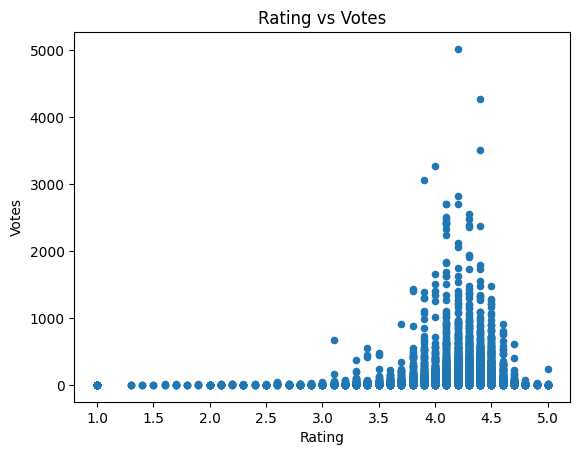

In [22]:
ax=df.plot(kind='scatter',x='Rating',y='Votes')
ax.set_xlabel('Rating')
ax.set_ylabel('Votes')
ax.set_title('Rating vs Votes')
plt.show()

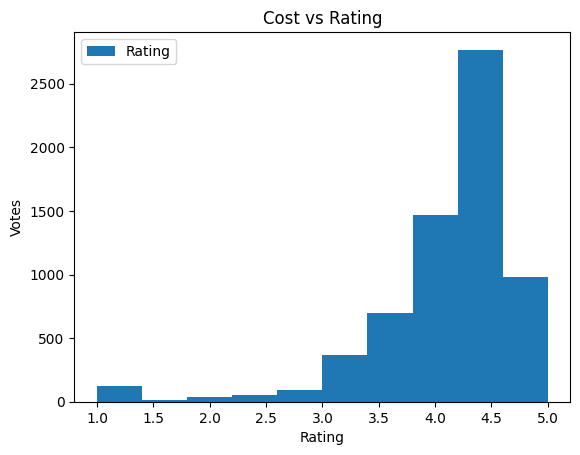

In [23]:
ax=df.plot(kind='hist',x='Cost',y='Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Votes')
ax.set_title('Cost vs Rating')
plt.show()